# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [230]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [231]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [251]:
display(df_taxi.head(3))
display(df_taxi.dtypes)
display(df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

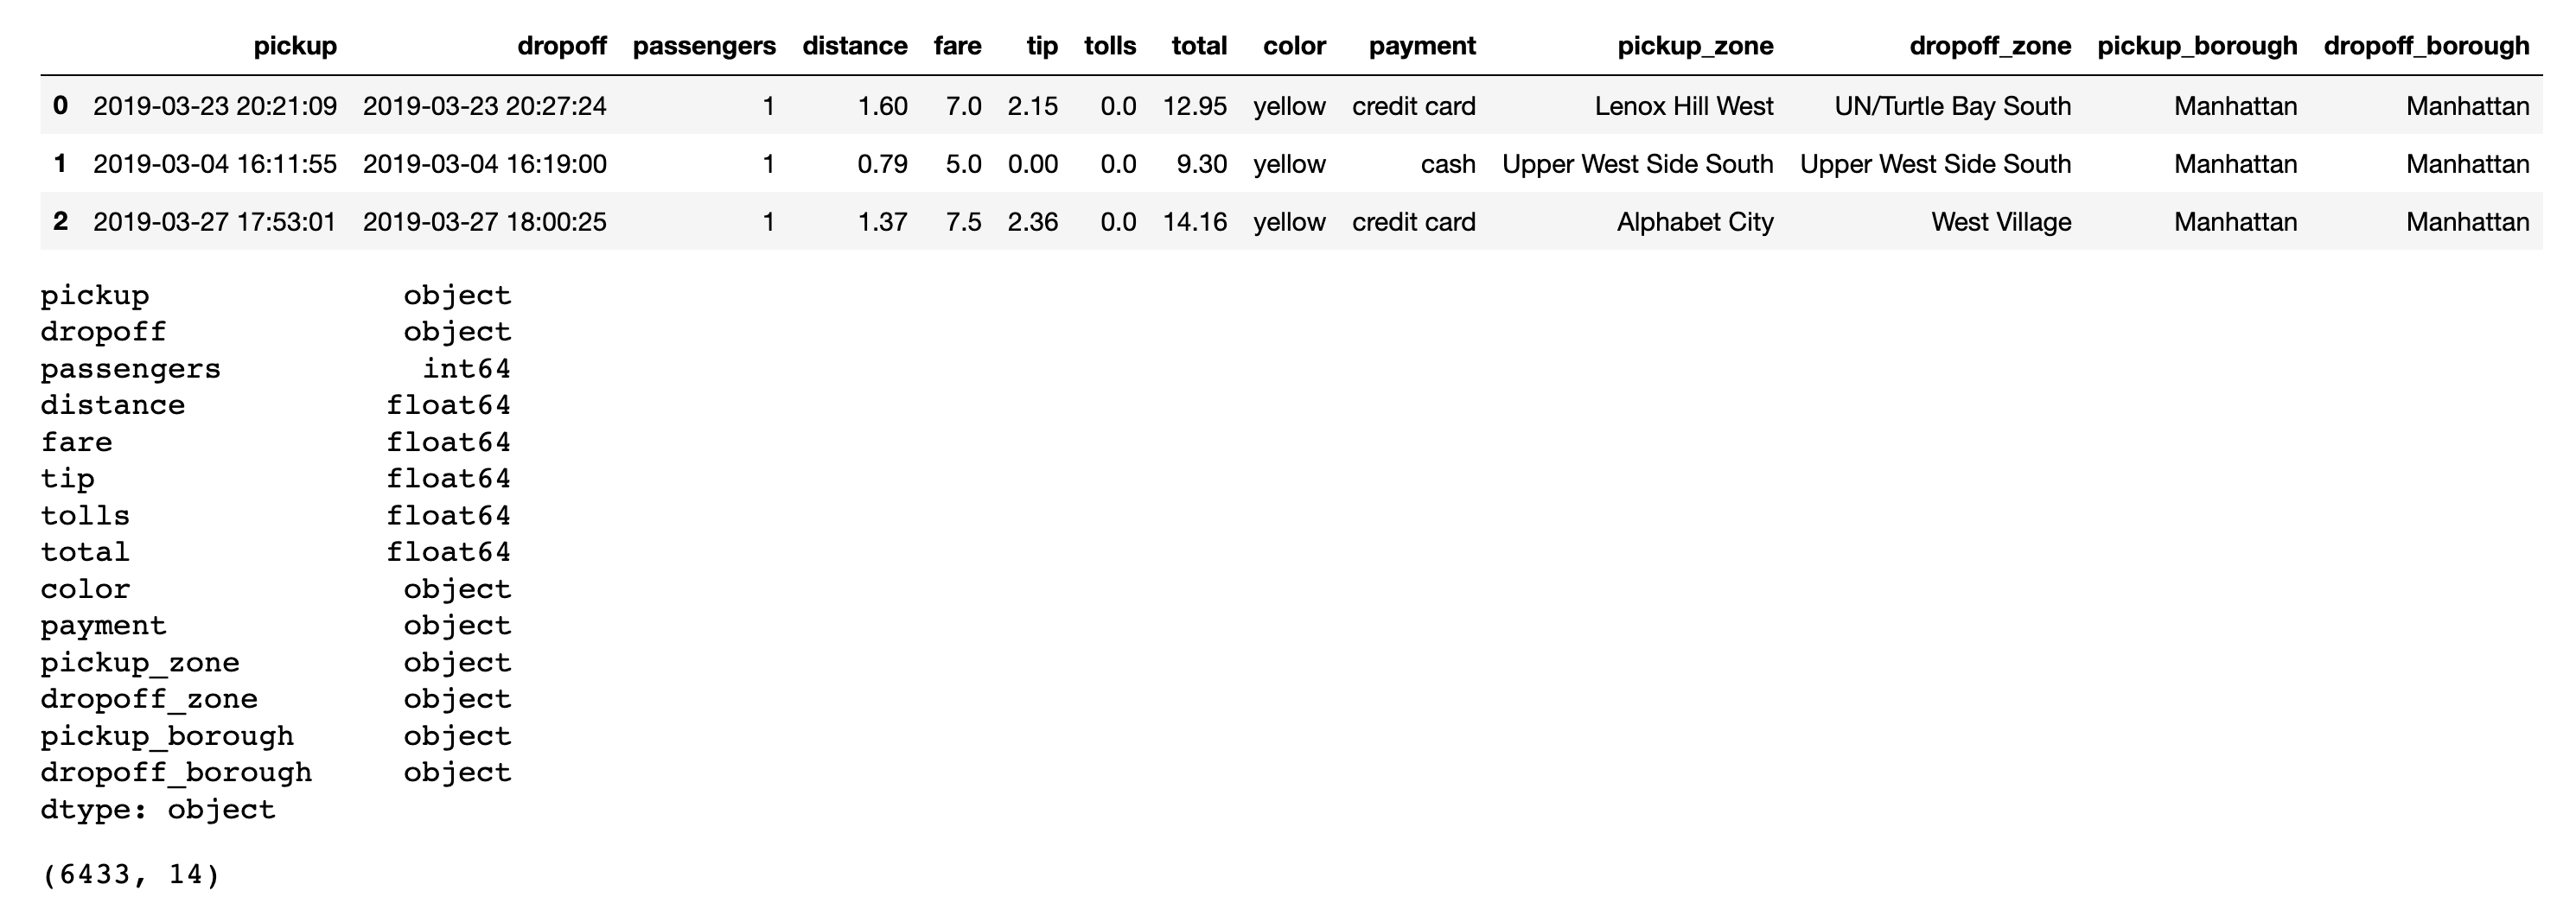

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [234]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [25]:
df_taxi[df_taxi.dropoff_zone.isna()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


Проаналізувавши рядки, в яких є пропущені значення в колонках pickup_zone, dropoff_zone, pickup_borough, dropoff_borough, можна зробити висновок, що більшість цих рядків стосуються поїздок, які, на мій погляд, не відбулись по якійсь причині і мають значення 0.00 в колонці distance. В інших випадках, скоріше за все були проблеми з GPS-сигналом, або початок чи кінець поїздки був здійснений за межами зони, визначеної для цієї бази. В деяких рядках заповнені значення pickup_zone і pickup_borough, а значення dropoff_zone і dropoff_borough відсутні. В цьому випадку можна припустити, ще поїздка не закінчилась, як планувалось, в певному районі, а перервалась раніше по якійсь причині, можливо через корки пасажир вийшов раніше.

In [236]:
df_taxi[df_taxi.payment.isna()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.0,0.00,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.0,0.00,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.0,0.00,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.0,0.00,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
621,2019-03-15 17:16:35,2019-03-15 17:25:01,1,1.3,7.5,0.0,0.00,11.80,yellow,NaN,Upper East Side North,Upper East Side South,Manhattan,Manhattan
770,2019-03-02 03:16:59,2019-03-02 03:17:06,0,9.4,2.5,0.0,0.00,3.80,yellow,NaN,JFK Airport,JFK Airport,Queens,Queens
913,2019-03-23 11:26:58,2019-03-23 11:35:17,2,1.3,7.5,0.0,0.00,10.80,yellow,NaN,Upper East Side South,Lincoln Square West,Manhattan,Manhattan
953,2019-03-08 02:58:37,2019-03-08 03:19:27,2,6.9,23.5,0.0,0.00,27.30,yellow,NaN,Garment District,Central Harlem North,Manhattan,Manhattan
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.0,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1372,2019-03-12 09:19:44,2019-03-12 09:43:09,1,1.6,14.5,0.0,0.00,17.80,yellow,NaN,Midtown East,Garment District,Manhattan,Manhattan


Чому є пропущені значення в колонці payment - можливо оплата була здійснена якимось іншим способ, що не визначений в цьому дата сеті, а можливо ця поїздка була за рахунок компанії, чи по якійсь акції, типу кожна 5-та поїздка безкоштовна.

In [28]:
df_taxi[df_taxi['distance'] == 0]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.00,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.00,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.00,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.00,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens


На мій погляд, в даних є рядки з distance==0, а total!=0 через те що поїздка просто не відбулась. Як ми можемо переконатись в цьому? Завдяки даним про час поїздки. Порівнявши значення колонок pickup і dropoff ми можемо побачити, що тривалість поїздок, по яким значення distance==0 складає всього декілька секунд. Тобто, скоріше за все, це просто не виконані/відмінені поїздки. Але раз вже таксі викликане, то плата за це точно має бути знятою, тому і total!=0 для цих поїздок.

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [237]:
df_taxi_clean = df_taxi.fillna("NA")

Після виконання завдання запустіть наступну клітинку:

In [238]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

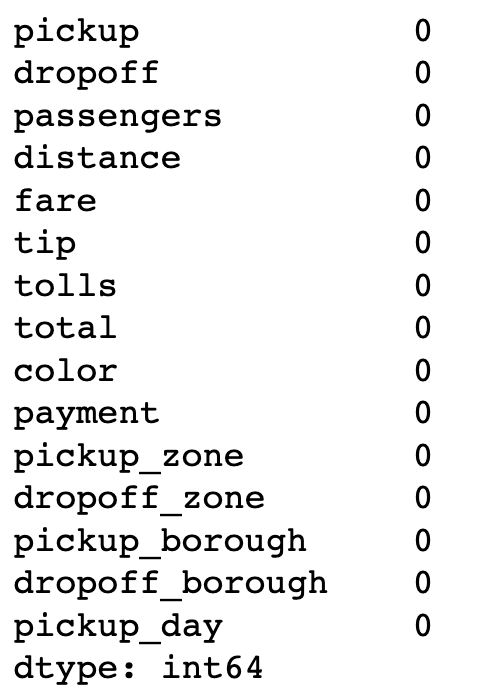

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [37]:
df_taxi_clean.pickup.dtypes

dtype('<M8[ns]')

У моєму випадку дані завантажились таким чином, що колонки 'pickup' і 'dropoff' одразу мали тип datetime64[ns]. Якщо б це було не так, то я б написала функцію для перетворення даних у потрібний тип.

In [64]:
def convert_to_datetime(df_taxi_clean, pickup):
    df_taxi_clean[pickup] = pd.to_datetime(df_taxi_clean[pickup])
    return df_taxi_clean

Після виконання завдання запустіть наступну клітинку:

In [65]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

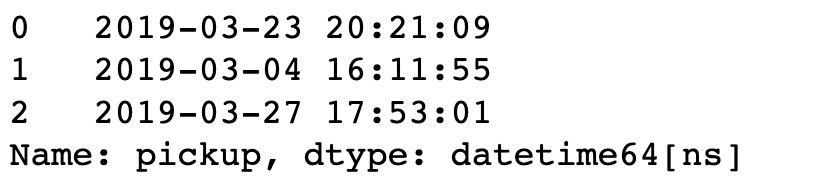

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [239]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

In [240]:
df_taxi_clean.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30


А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

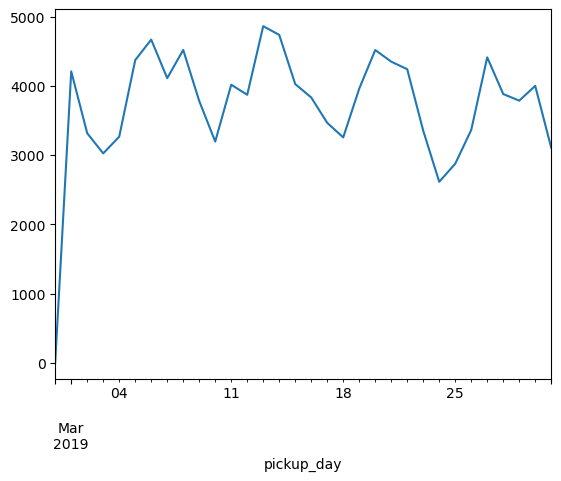

In [53]:
df_taxi_clean.groupby('pickup_day')['total'].sum().plot();

Дивним виглядає те, що перше значення занадто мале і лінія графіку починається майже з нуля і потім стрімко йде вгору. Тому варто згрупувати дані по pickup_day, визначити скільки рядків відповідає кожному з них і проаналізувати результати. Також, дивлячись на графік, видно, що в певні дні є значний спад і значний підйом сумарних платежів. Заглянувши в календар за 2019 рік, ми можемо побачити, що найбільший підйом спостерігається в середині тижня, а спад припадає на кінець тижня, зокрема четвер, пятниця та вихідні. Тому варто продумати, як можна покращити показники днів, коли виручка просідає, можливо придумати якусь акцію. 

Очікується графік:

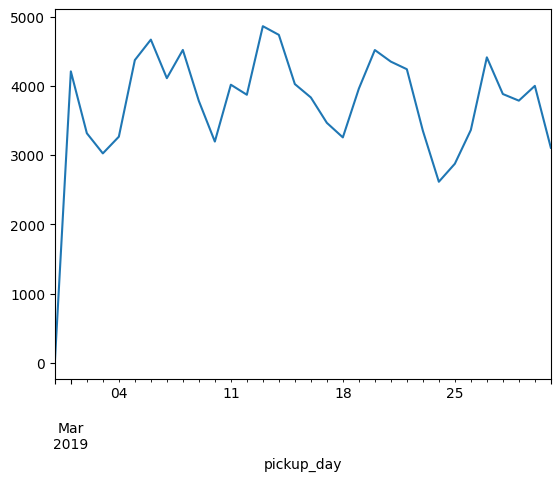

6.Виведіть кількість рядків для кожного pickup_day.

In [241]:
df_taxi_clean.groupby('pickup_day')['total'].count()

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
Name: total, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [242]:
df_taxi_clean = df_taxi_clean[df_taxi_clean.pickup_day != '2019-02-28']

In [243]:
df_taxi_clean.shape

(6432, 15)

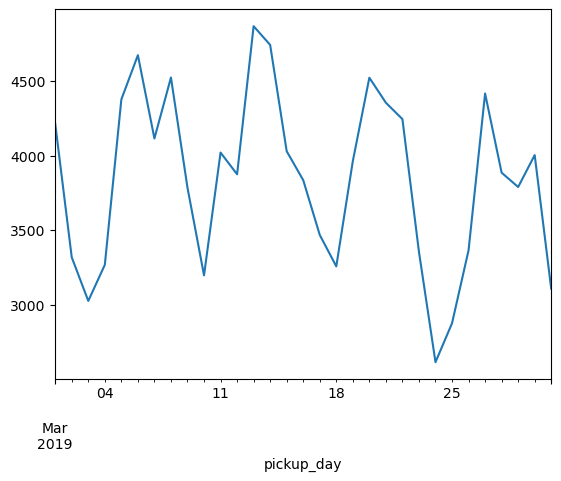

In [70]:
df_taxi_clean.groupby('pickup_day')['total'].sum().plot();

Очікуваний графік:

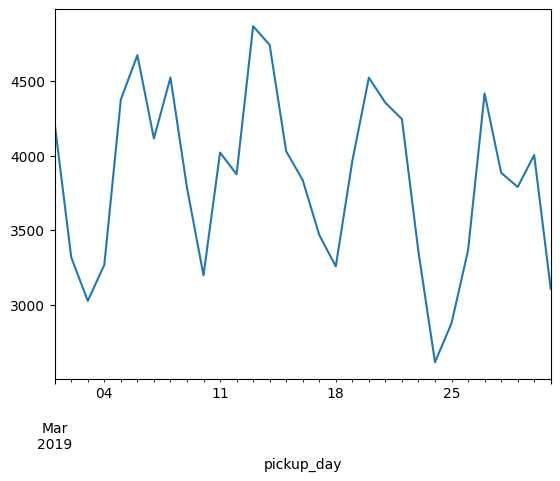

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [72]:
borough_pivot = df_taxi_clean.pivot_table(index='pickup_day',columns='pickup_borough',values='total',aggfunc='sum')
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,NA,Queens
pickup_day,,,,,
2019-03-01,123.42,353.05,3169.47,14.60,553.29
2019-03-02,NaN,146.56,2716.33,NaN,456.13
2019-03-03,80.75,407.06,2100.23,10.55,428.73
2019-03-04,92.00,188.73,2026.17,NaN,962.18
2019-03-05,98.16,558.40,2981.26,NaN,739.56
2019-03-06,130.65,198.53,3501.07,10.00,833.36
2019-03-07,NaN,440.75,3087.82,NaN,587.13
2019-03-08,79.20,237.47,3408.85,18.35,780.34
2019-03-09,80.22,187.88,2967.71,38.26,511.73


In [74]:
borough_pivot = borough_pivot.drop(columns='NA')

Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

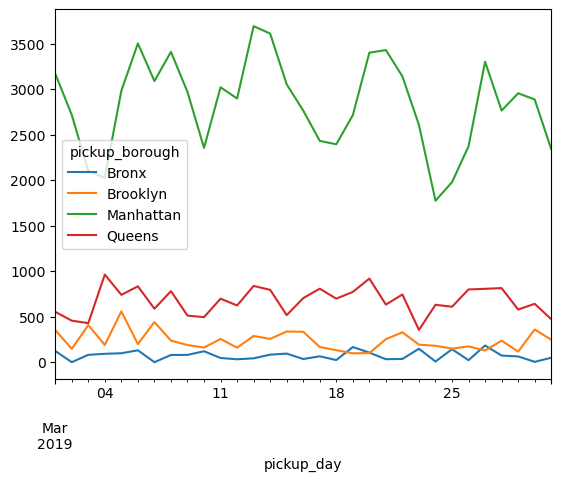

In [75]:
borough_pivot.fillna(0).plot();

В районі Manhattan найчастіше найбільша сума денних платежів за поїздки на таксі

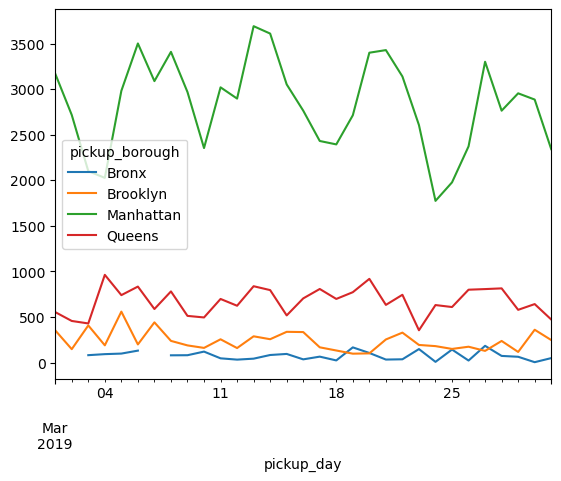

In [78]:
borough_pivot.plot();

Щодо частини fillna(0), думаю, варто заповнити пропущені значення нулями, щоб уникнути пропусків на графіку та забезпечити відображення всіх днів по районах навіть у випадку відсутності платежів.

Очікуваний графік :

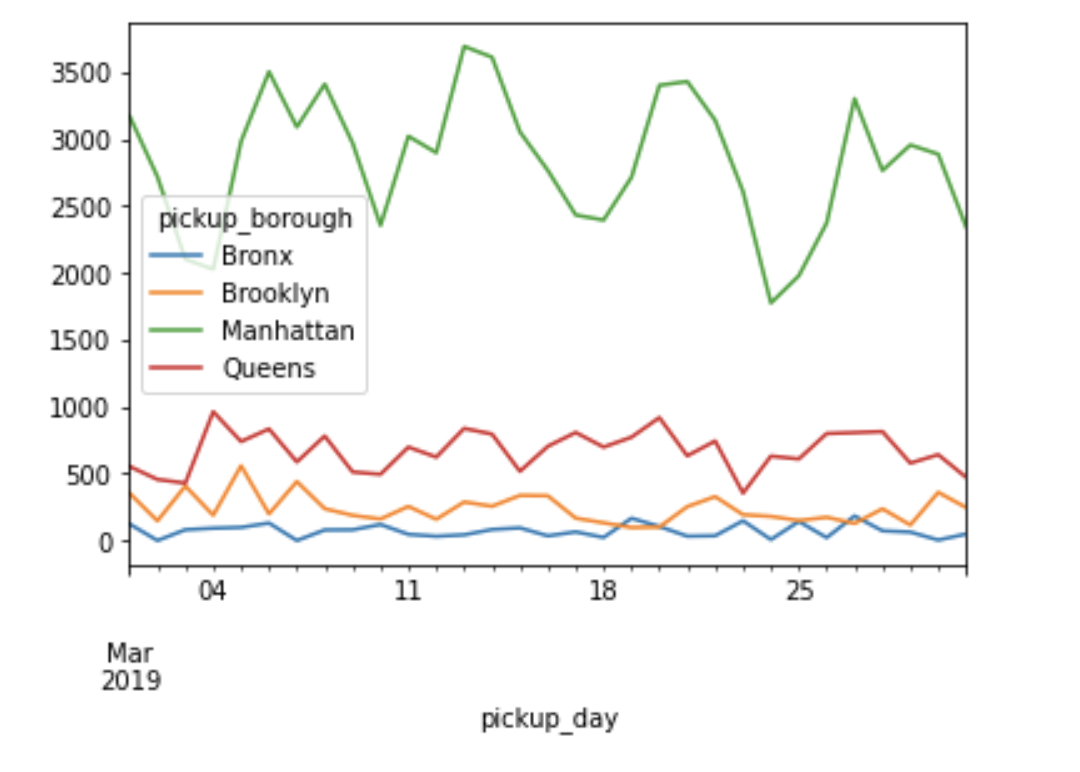

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

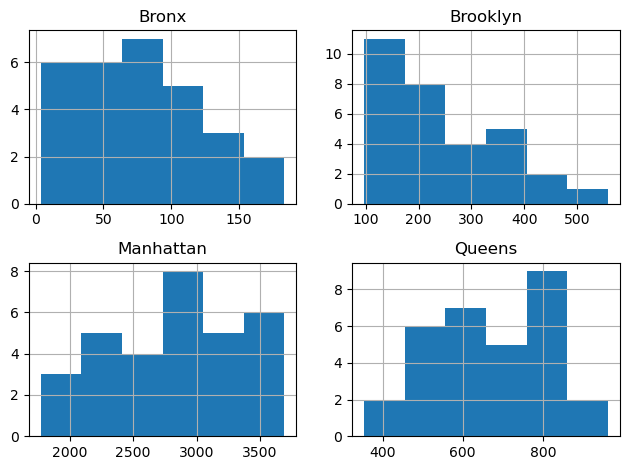

In [95]:
borough_pivot.hist(bins = 6)
plt.tight_layout();

Я спробувала бвгвто різних варіацій з кількістю бінів, і з кількістю бінів 6 вийшов майже такий самий варіант, як у прикладі розвязку. На мою думку, так біни краще згруповані і якісніше видно розподіл даних

Приклад одного з правильних виконань завдання:

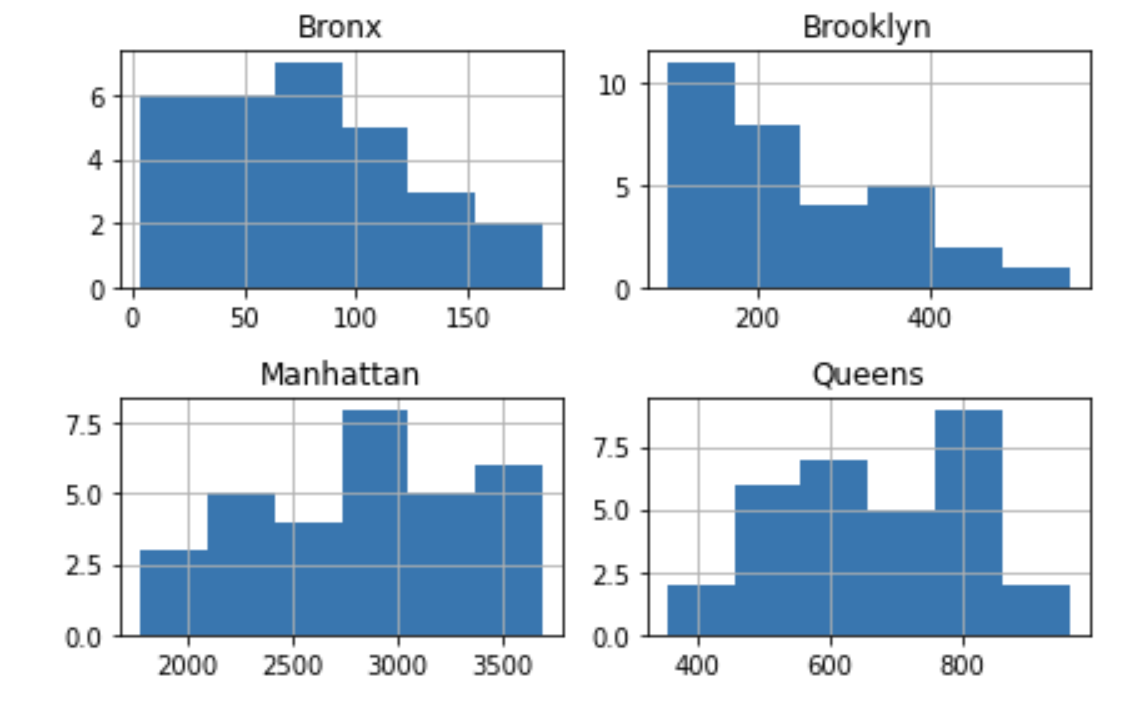

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

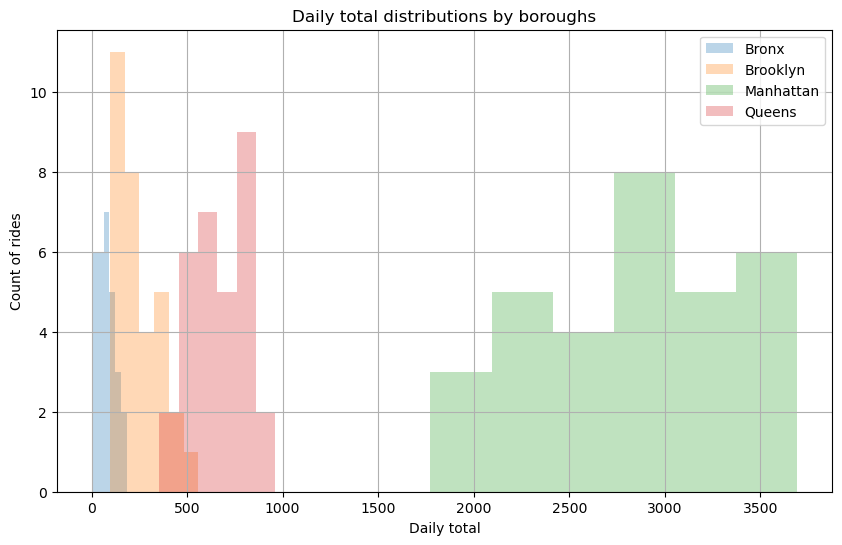

In [144]:
plt.figure(figsize=(10,6))
for col in borough_pivot:
    plt.hist(borough_pivot[col], bins=6, alpha=.3, label=col)
plt.title('Daily total distributions by boroughs')
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.legend()
plt.grid(True)
plt.show()

Очікуваний результат:

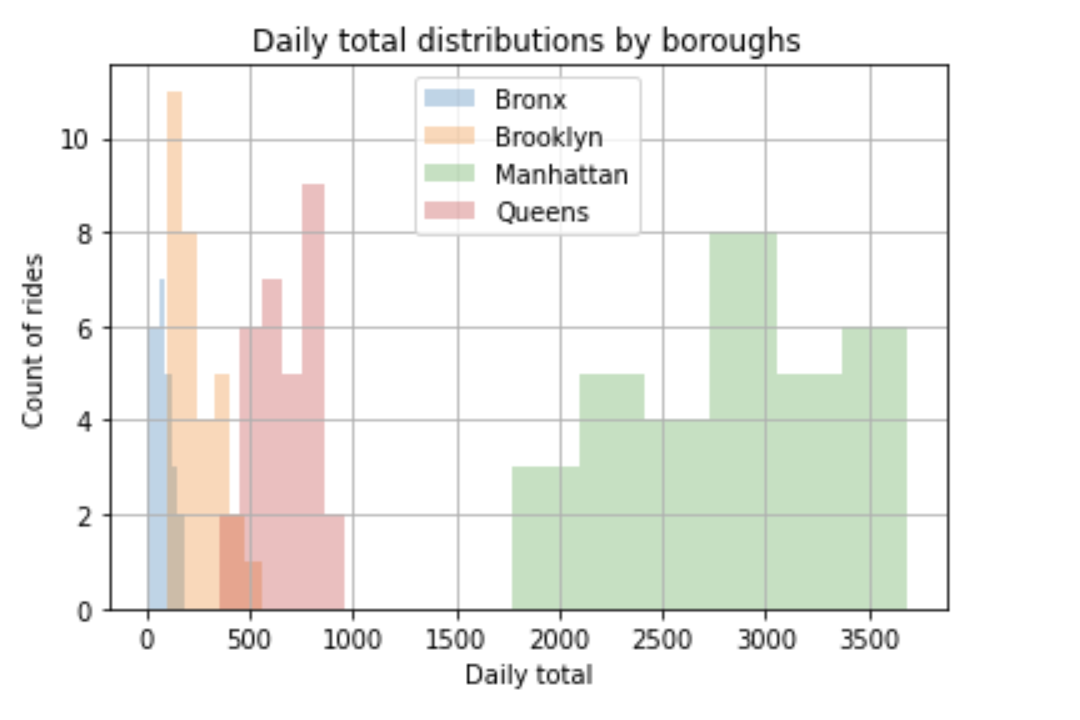

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

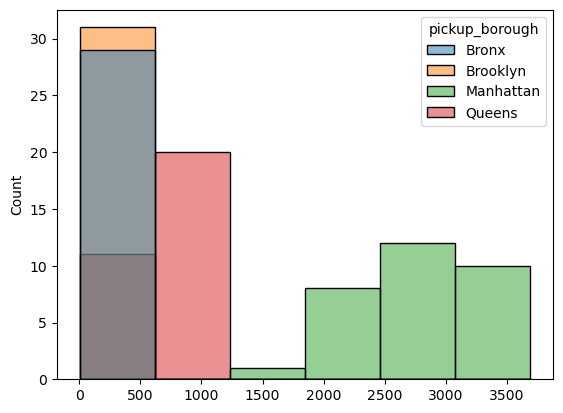

In [116]:
sns.histplot(data=borough_pivot, bins=6);

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

In [135]:
df_taxi_clean.color.value_counts()

yellow    5451
green      981
Name: color, dtype: int64

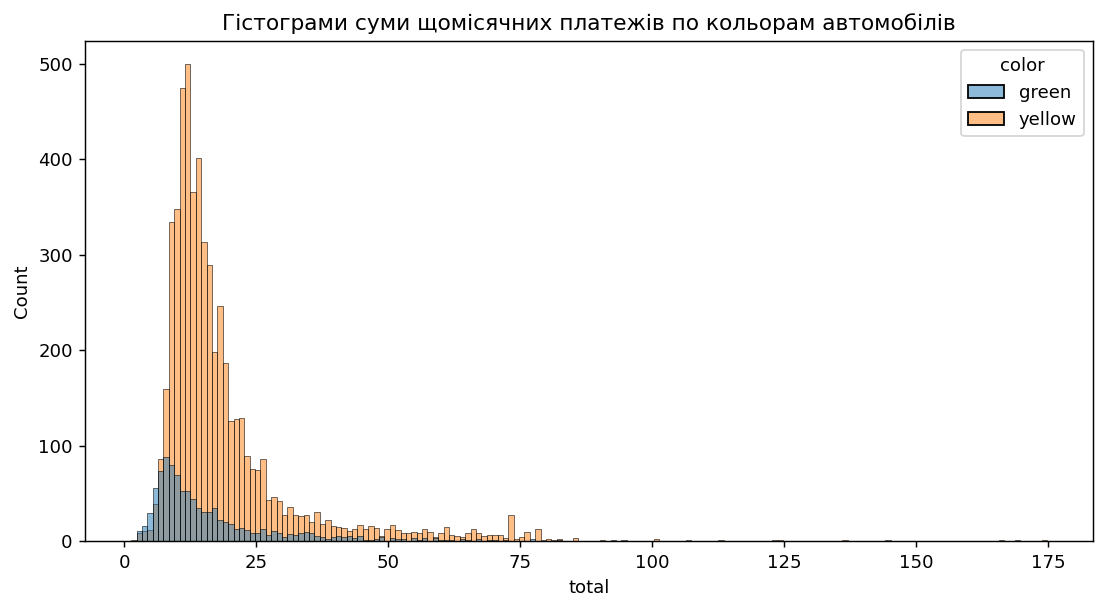

In [136]:
plt.figure(figsize=(10, 5), dpi=130)
sns.histplot(data=df_taxi_clean.sort_values('color'), x='total', hue='color')
plt.title('Гістограми суми щомісячних платежів по кольорам автомобілів')
plt.xlabel('total')
plt.ylabel('Count')
plt.show()

Очікуваний результат:

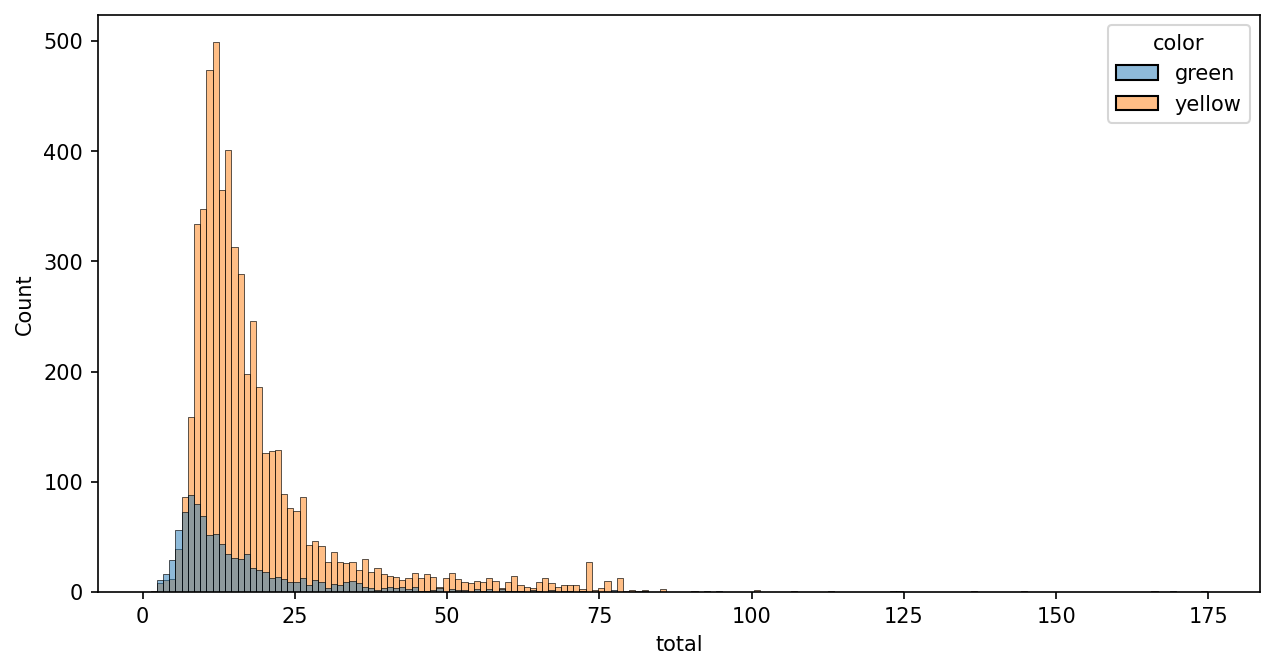

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

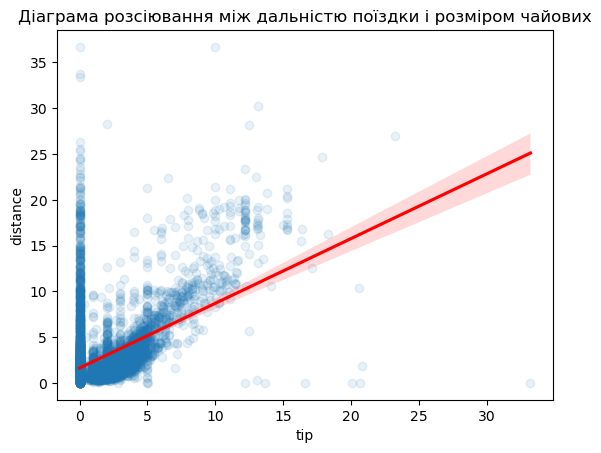

In [140]:
sns.regplot(data=df_taxi_clean, x='tip', y='distance', scatter_kws={'alpha': .1}, line_kws={'color': 'red'})
plt.title('Діаграма розсіювання між дальністю поїздки і розміром чайових')
plt.xlabel('tip')
plt.ylabel('distance');

Один з можливих результатів (побудовано з seaborn):

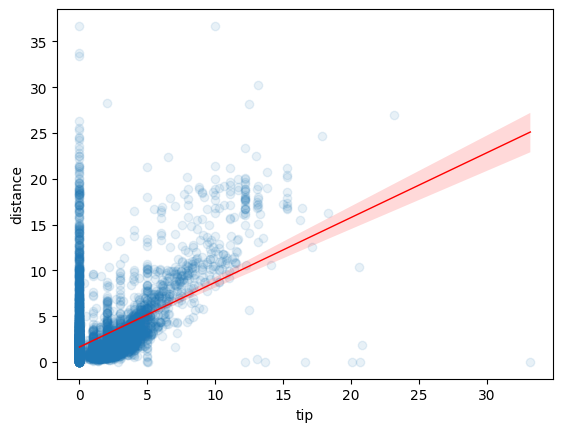

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

На мою думку пряма лінія з точок, паралельна осі y, показує що значення чайових у розмірі '0.00' зустрічається на поїздках різної дальності. 

In [149]:
df_taxi_clean.groupby(['tip'])['pickup'].count()

tip
0.00     2310
0.01        7
0.02        3
0.06        1
0.08        1
         ... 
20.56       1
20.65       1
20.80       1
23.19       1
33.20       1
Name: pickup, Length: 489, dtype: int64

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найрідше** дають чайові?
- а в поїздках з якого району **найчастіше** дають чайові? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

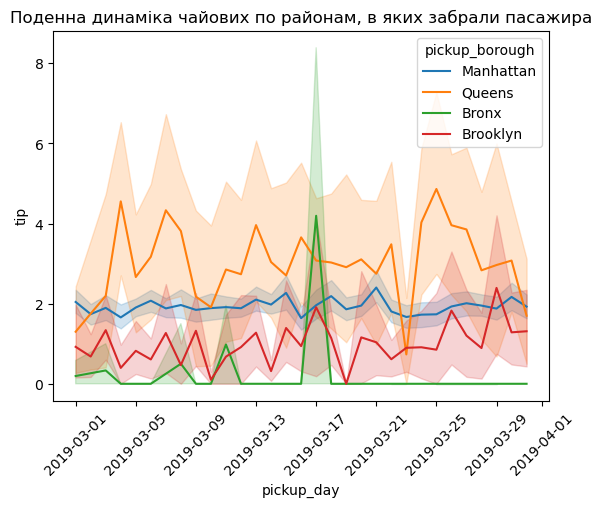

In [155]:
sns.lineplot(data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA'], x='pickup_day', y='tip', hue='pickup_borough')
plt.title('Поденна динаміка чайових по районам, в яких забрали пасажира')
plt.xlabel('pickup_day')
plt.ylabel('tip')
plt.xticks(rotation=45)
plt.legend(title='pickup_borough');


Відповіді на питання:

1) при початку поїздки в якому районі найнижчий середній розмір чайових? - Bronx
2) а в поїздках з якого району найвищий середній розмір чайових? - Queens
3) при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)? - Manhattan

Один з можливих результатів (побудовано з seaborn):

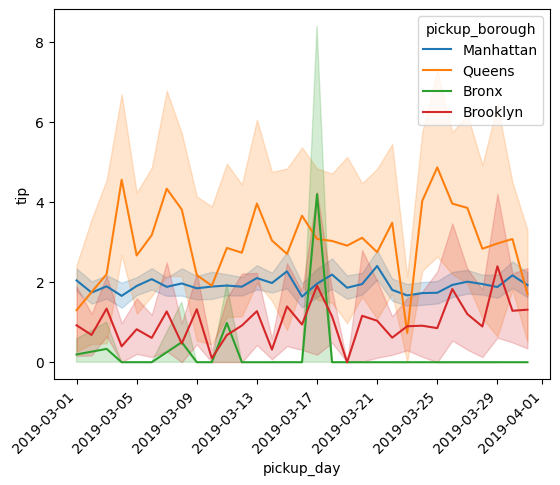

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

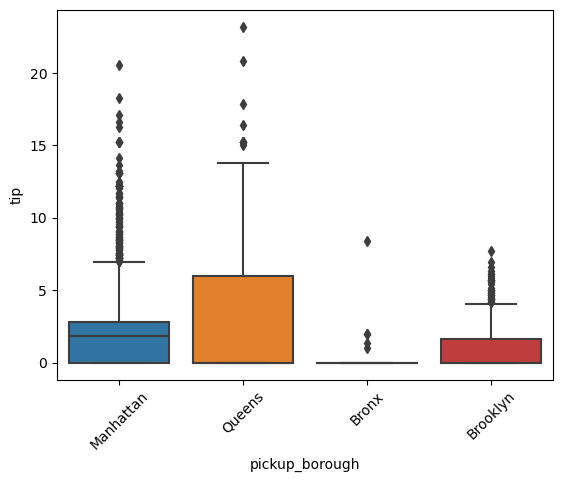

In [158]:
sns.boxplot(data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA'], x='pickup_borough', y='tip')
plt.xlabel('pickup_borough')
plt.ylabel('tip')
plt.xticks(rotation=45);


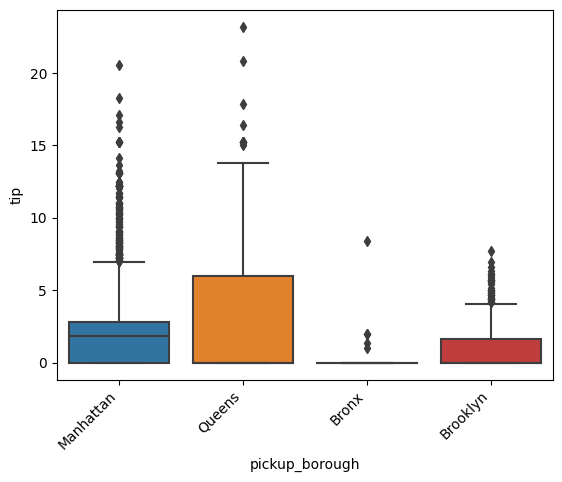

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

15.1. Графік залежності кількості поїздок від часу доби

In [159]:
df_taxi_clean['pickup_hour'] = df_taxi_clean['pickup'].dt.hour

In [160]:
df_taxi_clean['pickup_hour']

0       20
1       16
2       17
3        1
4       13
        ..
6428     9
6429    17
6430    22
6431    10
6432    19
Name: pickup_hour, Length: 6432, dtype: int64

In [165]:
df_taxi_clean.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,17


In [167]:
trips_by_hour = df_taxi_clean.groupby('pickup_hour').size()
trips_by_hour

pickup_hour
0     205
1     110
2     101
3      67
4      57
5      51
6     142
7     221
8     313
9     319
10    325
11    295
12    334
13    316
14    360
15    330
16    336
17    388
18    417
19    406
20    368
21    355
22    321
23    295
dtype: int64

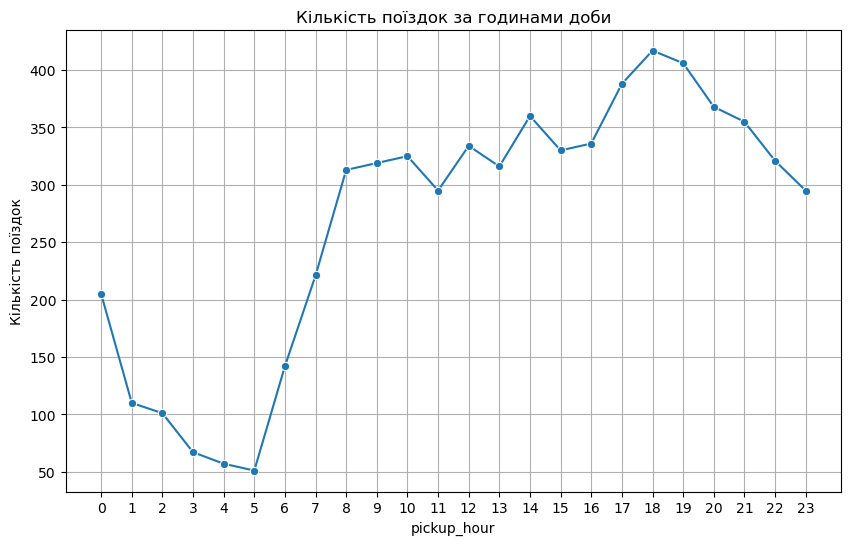

In [173]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=trips_by_hour, marker='o')
plt.title('Кількість поїздок за годинами доби')
plt.xlabel('pickup_hour')
plt.ylabel('Кількість поїздок')
plt.grid(True)
plt.xticks(range(24))
plt.show()

- З графіку видно, що найменша кількість поїздок припадає на 5 годину ранку і далі стрімко починає рости до 8 години, і досягає свого найвищого рівня о 18 годині, після чого знову починає спадати.
- Таким чином, графік показує піки та спади кількості поїздок в різний час доби. За допомогою цих даних, бізнес-власники таксі можуть налаштувати оптимальний режим роботи для водіїв та автомобілів. В час, коли графік показує пік попиту, може бути доцільно залучити більше водіїв протягом цього періоду.
- рафік допомагає визначити періоди з підвищеним попитом. ЗАвдяки чому можна встановити більш вигідні ціни за поїздки. Наприклад, наш графік показує, що пік попиту припадає на вечірні години після робочого дня, тому можна розглянути можливість встановлення вищих тарифів в цей період.
- Аналізуючи графік залежності кількості поїздок від часу доби на протязі тривалого періоду, можна виявити тенденції та циклічність у попиті. 

15.2. Графік залежності кількості поїздок по районам від часу доби

In [185]:
borough_by_hour_pivot = df_taxi_clean.pivot_table(index='pickup_hour',columns='pickup_borough',values='pickup',aggfunc='count')
borough_by_hour_pivot = borough_by_hour_pivot.drop(columns='NA')
borough_by_hour_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_hour,,,,
0,NaN,18.0,158.0,27.0
1,1.0,5.0,86.0,17.0
2,NaN,11.0,75.0,15.0
3,1.0,5.0,54.0,7.0
4,NaN,1.0,51.0,5.0
5,NaN,1.0,41.0,8.0
6,4.0,12.0,109.0,14.0
7,6.0,10.0,188.0,17.0
8,9.0,11.0,269.0,23.0


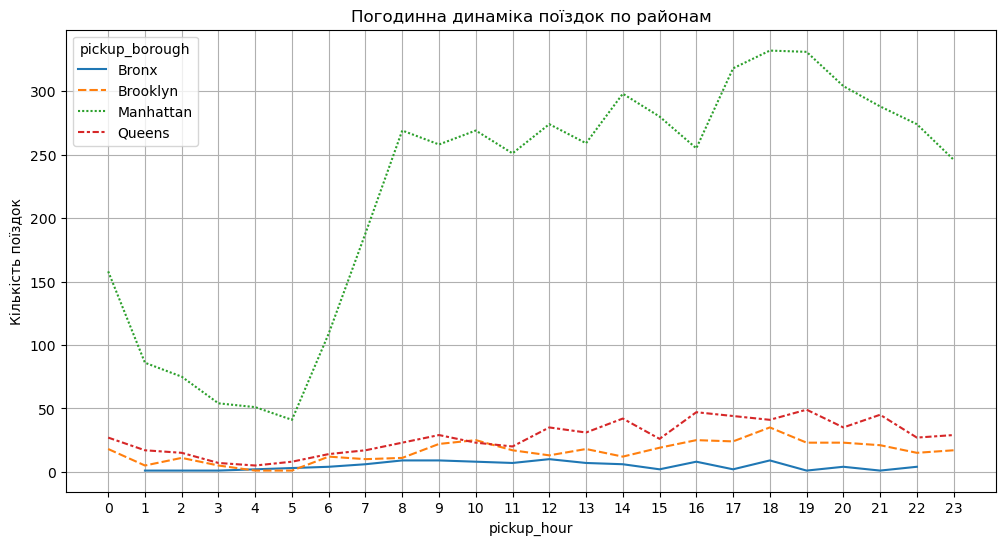

In [186]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=borough_by_hour_pivot)
plt.title('Погодинна динаміка поїздок по районам')
plt.xlabel('pickup_hour')
plt.ylabel('Кількість поїздок')
plt.grid(True)
plt.xticks(range(24))
plt.show()

- даний графік допомогає ідентифікувати години, коли попит на таксі найвищий у різних районах. Це може бути корисно для призначення додаткових таксі на ті часи, щоб задовольнити зростаючий попит. По графіку видно, що район Manhattan Показує найстрімкіше зростання числа поїздок у порівняні з іншими районами. І в пік ділової активності поїздок значно більше ніж у інших районах.
 - графік може стати у нагоді власникам бізнесу при розподілі ресурсів. Наш графік показує, що попит зростає у вечірні години, особливо в районі Manhattan, тому може бути доцільним залучати додаткових водіїв та автомобілів протягом цього періоду.

15.3. Побудуємо графік розподілу методів оплати щоб зрозуміти, який метод оплати користується більшою популярністю.

In [216]:
df_taxi_clean.payment.value_counts()

credit card    4577
cash           1811
NA               44
Name: payment, dtype: int64

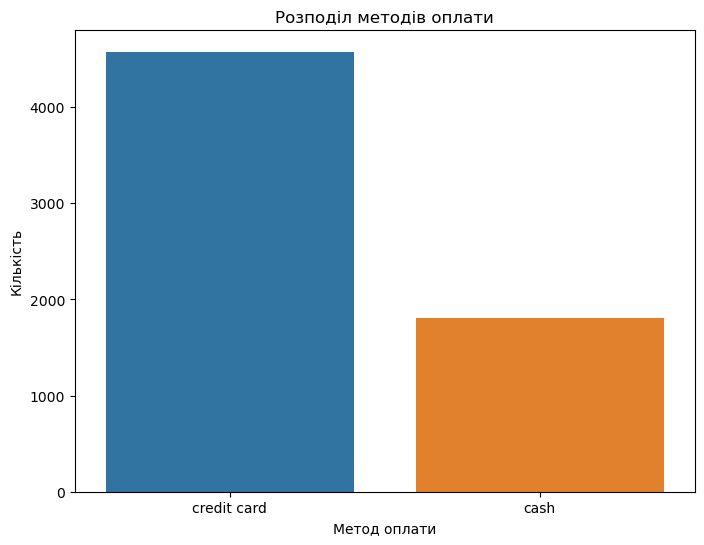

In [218]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_taxi_clean[df_taxi_clean.payment!='NA'], x='payment')
plt.title('Розподіл методів оплати')
plt.xlabel('Метод оплати')
plt.ylabel('Кількість');

Ми бачимо, що оплата кредитною картою значно популярніший метод за оплату готівкою. Ця інформація допомагає компанії визначити, які методи оплати слід підтримувати і які можна заохотити, наприклад, за допомогою пропозицій зі знижками або бонусними програмами.

15.4. Побудуємо графік залежності чайових від способу оплати

In [219]:
tip_by_payment = df_taxi_clean.groupby('payment')['tip'].mean()

In [220]:
tip_by_payment 

payment
NA             0.000000
cash           0.000000
credit card    2.781805
Name: tip, dtype: float64

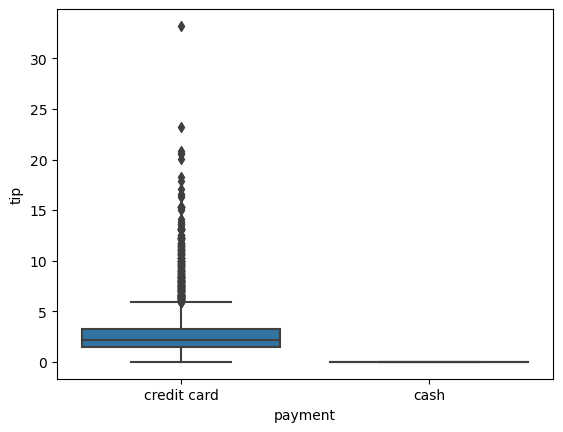

In [213]:
sns.boxplot(data=df_taxi_clean[df_taxi_clean.payment!='NA'], x='payment', y='tip')
plt.xlabel('payment')
plt.ylabel('tip');

Бачимо, що чайові залишають тільки ті пасажири, які оплачують кредитною картою. Це може вказувати на необхідність підтримки безготівкових платежів, наприклад, шляхом впровадження електронних платіжних систем.

15.5. Подубуємо графік залежності кількості пасажирів від години доби

In [209]:
passengers_by_hour = df_taxi_clean.groupby('pickup_hour')['passengers'].sum()
passengers_by_hour 

pickup_hour
0     326
1     194
2     153
3     105
4      95
5      76
6     202
7     322
8     465
9     504
10    490
11    474
12    498
13    489
14    603
15    484
16    527
17    550
18    649
19    628
20    548
21    529
22    536
23    454
Name: passengers, dtype: int64

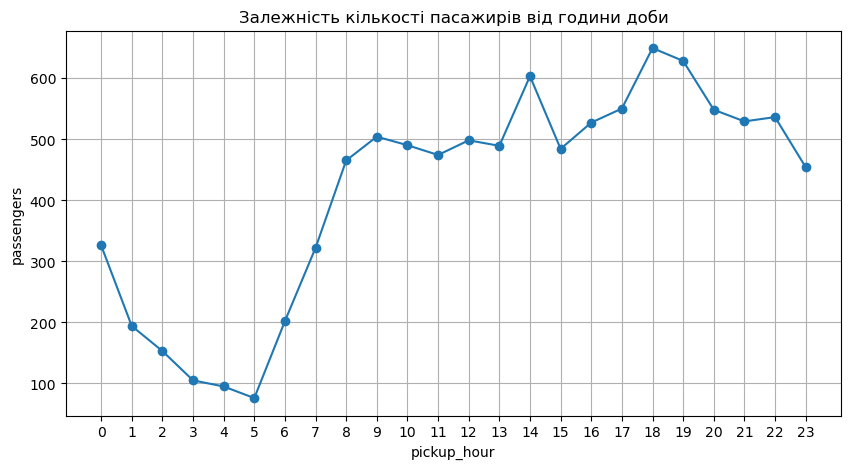

In [212]:
plt.figure(figsize=(10, 5))
plt.plot(passengers_by_hour.index, passengers_by_hour.values, marker='o')

plt.title('Залежність кількості пасажирів від години доби')
plt.xlabel('pickup_hour')
plt.ylabel('passengers')
plt.grid(True)
plt.xticks(range(24))

plt.show()

Можемо помітити, що лінія цього графіка дуже схожа на лінію графіку "Кількість поїздок за годинами доби", тут також видно, що найменша кількість пасажирів припадає на 5 годину ранку і далі стрімко починає рости до 8 години, і досягає свого найвищого рівня о 18 годині, після чого знову починає спадати.
Як цей графік може допомогти бізнесу:
- допоможе виявити піки популярності поїздок у певні години доби. Це може допомогти встановити оптимальні години роботи для водіїв, коли попит на таксі є найвищим. Можна планувати більше водіїв на дорозі в ці піки, щоб задовольнити збільшений попит.
- можна розробити рекламні акції та скидки, щоб підняти попит на поїздки в години, коли виявиться спад.
- допоможе спрогнозувати попит на майбутні періоди.

15.6 Розподіл відстані поїздок таксі по районам. 

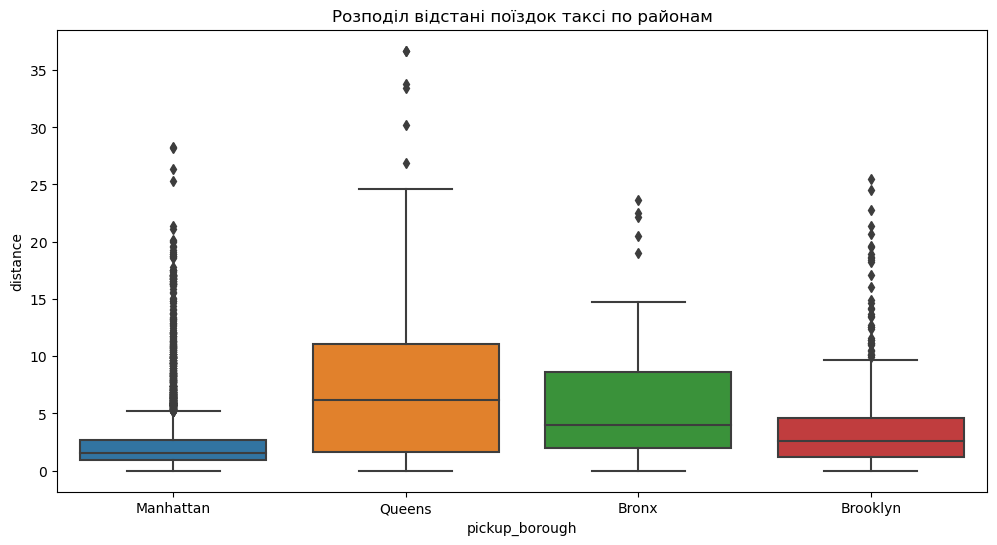

In [250]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA'], x='pickup_borough', y='distance')
plt.xlabel('pickup_borough')
plt.ylabel('distance')
plt.title('Розподіл відстані поїздок таксі по районам');


Графік дозволяє порівняти розподіл відстаней поїздок між різними районами. Можна помітити, які райони мають середньо більші або менші відстані поїздок. Виявляється, що хоч в районі Manhattan їздять найчастіше за медіанним значенням на найкоротші дистанції, проте в цьому напрямку кількість поїздок значно вища в порівнянні з іншими районами (що ми бачили на графіках вище). А от в районі Queens медіанне значення відстані поїздок найвище.